In [ ]:
import pandas as pd
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
# from lightautoml.dataset import NumpyDataset
# from lightautoml.reader import NumpyReader
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from lightautoml.automl.presets.tabular_presets import TabularAutoML
# from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [10]:
trainingSample = pd.read_excel('D:/maga_1/ML/data/external/train.xls', sheet_name="данные")
testingSample = pd.read_excel('D:/maga_1/ML/data/external/test.xls', sheet_name="данные")
target = pd.read_excel('D:/maga_1/ML/data/external/submission.xls', sheet_name="данные")

In [27]:
TARGET_NAME = 'TARGET'
task = Task('binary')
automl = TabularAutoML(
    task=task,
    timeout=3600,  # Максимальное время работы модели (секунды)
    cpu_limit=4,   # Количество CPU
    memory_limit=16  # Ограничение памяти (ГБ)
)
# Обертка для генерации отчетов
# automl = ReportDeco(automl)
automl_with_report = ReportDeco(output_path='report.html')(automl)
# Определяем роли переменных
roles = {'target': TARGET_NAME}

In [ ]:
of_preds = automl_with_report.fit_predict(
    train_data=trainingSample,
    
    roles=roles,
    verbose=1,
    #report=True  # Активация автоматического отчета
)
# Генерация отчета
# tabular_report = tabularReport(automl)
# tabular_report.generate()



[13:22:24] Stdout logging level is INFO.
[13:22:24] Task: binary

[13:22:24] Start automl preset with listed constraints:
[13:22:24] - time: 3600.00 seconds
[13:22:24] - CPU: 4 cores
[13:22:24] - memory: 16 GB

[13:22:24] Train data shape: (15223, 52)

[13:22:38] Layer 1 train process start. Time left 3586.07 secs
[13:22:39] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[13:22:46] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.6894412275317467
[13:22:46] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[13:22:46] Time left 3577.49 secs

[13:22:48] Selector_LightGBM fitting and predicting completed
[13:22:49] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[13:23:02] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.6882912210216549
[13:23:02] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[13:23:02] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 300.00 secs


Optimization Progress: 100%|██████████| 101/101 [03:46<00:00,  2.25s/it, best_trial=98, best_value=0.726]

[13:26:49] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM completed
[13:26:49] Start fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ...


[13:26:54] Fitting Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM finished. score = 0.6922884668659364
[13:26:54] Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM fitting and predicting completed
[13:26:54] Start fitting Lvl_0_Pipe_1_Mod_2_CatBoost ...
[13:27:08] Fitting Lvl_0_Pipe_1_Mod_2_CatBoost finished. score = 0.6853024015902073
[13:27:08] Lvl_0_Pipe_1_Mod_2_CatBoost fitting and predicting completed
[13:27:08] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ... Time budget is 300.00 secs


Optimization Progress:  91%|█████████ | 92/101 [05:03<00:29,  3.30s/it, best_trial=54, best_value=0.735]

[13:32:12] Hyperparameters optimization for Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost completed
[13:32:12] Start fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost ...


[13:32:29] Fitting Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost finished. score = 0.6925301262529869
[13:32:29] Lvl_0_Pipe_1_Mod_3_Tuned_CatBoost fitting and predicting completed
[13:32:29] Time left 2994.31 secs

[13:32:29] Layer 1 training completed.

[13:32:29] Blending: optimization starts with equal weights. Score = 0.7041693
[13:32:30] Blending: iteration 0: score = 0.7065036, weights = [0.3800515  0.19704689 0.171494   0.         0.25140756]
[13:32:30] Blending: iteration 1: score = 0.7065199, weights = [0.3742565  0.20483993 0.16863057 0.         0.252273  ]
[13:32:30] Blending: iteration 2: score = 0.7065200, weights = [0.37443268 0.20478225 0.1685831  0.         0.25220194]
[13:32:30] Blending: no improvements for score. Terminated.

[13:32:30] Blending: best score = 0.7065200, best weights = [0.37443268 0.20478225 0.1685831  0.         0.25220194]
[13:32:30] Automl preset training completed in 606.62 seconds

[13:32:30] Model description:
Final prediction for new objects (level 0) = 
	

In [29]:
test_preds = automl.predict(testingSample)

y_pred = test_preds.data[:, 0]
roc_auc = roc_auc_score(target, y_pred)

print(f"ROC-AUC = {roc_auc:.4f}")

AttributeError: 'TabularAutoML' object has no attribute 'reader'

ROC-AUC = 0.7066


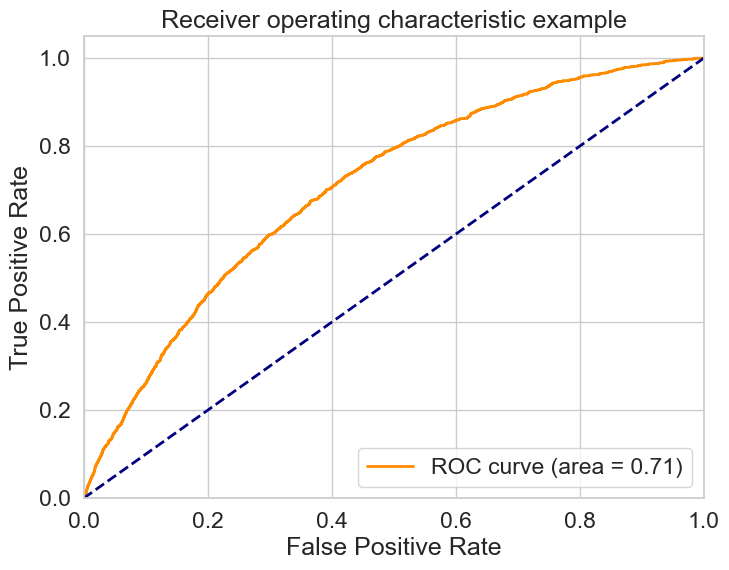

In [23]:
print(f"ROC-AUC = {roc_auc:.4f}")
fpr, tpr, thresholds = roc_curve(target, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [25]:
# Генерация и вывод расширенного отчета
# report = TabularReport(automl)
# report.generate(
#     path='D:/maga_1/ML/reports/automl_report.html',  # Путь для сохранения отчета
#     report_type='full',           # Тип отчета: краткий/полный
#     visualization=True            # Визуализация графиков
# )
tabular_report = TabularReport(automl_with_report)
tabular_report.generate(
     path='D:/maga_1/ML/reports/automl_report.html',
    report_mode='full',  # full/auto/compact
    visualization_level=2,
    train_data=train_data,
    test_data=test_data,
    roles=roles
)
automl_with_report.report()

NameError: name 'TabularReport' is not defined